In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(990.5), np.float64(656.5), np.float64(-0.5))

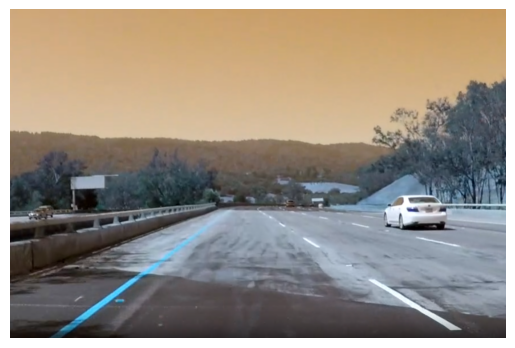

In [144]:
image = cv2.imread('path_4.PNG', cv2.IMREAD_COLOR_BGR)
plt.imshow(image)
plt.axis("off")

(np.float64(-0.5), np.float64(990.5), np.float64(656.5), np.float64(-0.5))

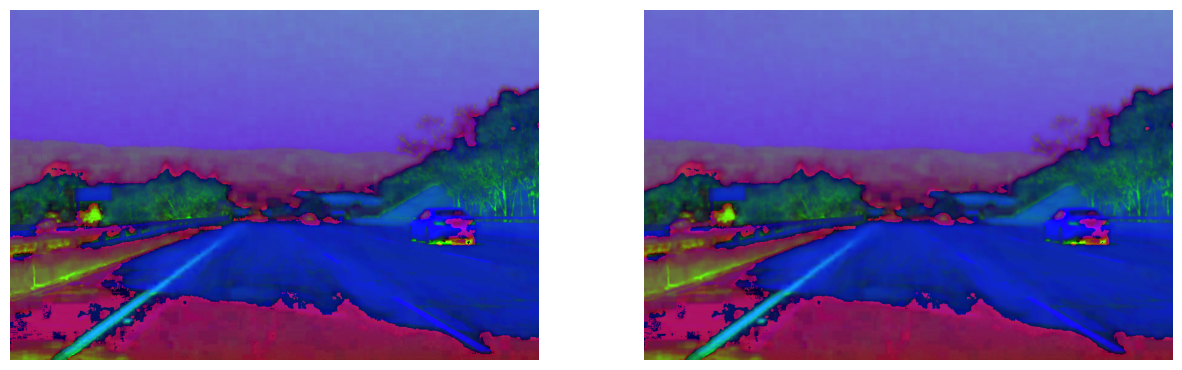

In [145]:
gauss = cv2.GaussianBlur(image, (5,5), 0)
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv_after_gauss = cv2.cvtColor(gauss, cv2.COLOR_BGR2HSV)
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.imshow(hsv_img)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(hsv_after_gauss)
plt.axis("off")

In [146]:
def region_of_interest(image, region_points):
    mask = np.zeros_like(image)

    cv2.fillPoly(mask, region_points, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

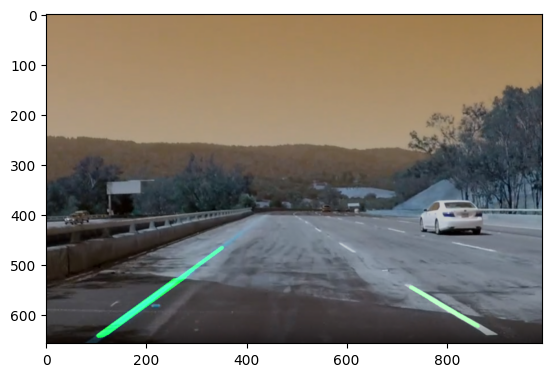

In [147]:
gauss = cv2.GaussianBlur(image, (5,5), 0)
hsv = cv2.cvtColor(gauss, cv2.COLOR_BGR2HSV)

lower_white = np.array([0, 0, 220])
upper_white = np.array([180, 25, 255])
mask_white = cv2.inRange(hsv, lower_white, upper_white)

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([35, 255, 255])
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

mask = cv2.bitwise_or(mask_white, mask_yellow)

height, width = image.shape[:2]

roi_vertices = np.array([[
        (0, height),
        (width, height),
        (int(width*0.55), int(height*0.6)),
        (int(width*0.45), int(height*0.6))
    ]], np.int32)

mask_roi = region_of_interest(mask, roi_vertices)

kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(mask_roi, cv2.MORPH_CLOSE, kernel)
erode = cv2.erode(closing, kernel, iterations = 1)

lines = cv2.HoughLinesP(erode, rho=1, theta=np.pi/180, threshold=60, minLineLength=40, maxLineGap=120)

line_img = np.zeros_like(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 5)
output = cv2.addWeighted(image, 0.8, line_img, 1, 0)

plt.imshow(output)


(np.float64(-0.5), np.float64(990.5), np.float64(656.5), np.float64(-0.5))

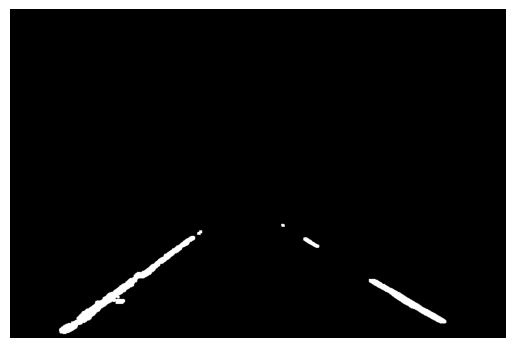

In [148]:
gauss_image = cv2.GaussianBlur(image, (3,3), 0)
hsv = cv2.cvtColor(gauss_image, cv2.COLOR_BGR2HSV)

lower_white = np.array([0, 0, 180])
upper_white = np.array([180, 30, 255])
mask_white = cv2.inRange(hsv, lower_white, upper_white)

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([35, 255, 255])
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
mask = cv2.bitwise_or(mask_white, mask_yellow)

kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(mask_roi, cv2.MORPH_CLOSE, kernel)
dilate = cv2.dilate(closing, kernel, iterations = 1)

canny = cv2.Canny(dilate, 50, 150)
plt.imshow(dilate, cmap = "gray")
plt.axis("off")